<a href="https://colab.research.google.com/github/Hamed18/CardioCare_AI/blob/main/CardioCare_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease Prediction - Machine Learning Project

This notebook predicts heart disease using a dataset with 13 features and a binary target. It includes exploratory data analysis, preprocessing, model training (KNN, Logistic Regression, Random Forest, SVM), evaluation, cross-validation, feature importance, and SHAP analysis.

## Table of Contents
1. [Importing Libraries](#importing-libraries)
2. [Loading the Dataset](#loading-the-dataset)
3. [Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)
4. [Checking for Duplicate and Missing Values](#checking-for-duplicate-and-missing-values)
5. [Handling Missing Values](#handling-missing-values)
6. [Data Preparation](#data-preparation)
   - [Data Separation as X and y](#data-separation-as-x-and-y)
   - [Data Splitting](#data-splitting)
   - [Scaling](#scaling)
   - [Preprocessing Pipeline for Additional Models](#preprocessing-pipeline-for-additional-models)
7. [Model Building](#model-building)
   - [K-Nearest Neighbors (KNN)](#k-nearest-neighbors-knn)
   - [Logistic Regression](#logistic-regression)
   - [Random Forest](#random-forest)
   - [Support Vector Machine (SVM)](#support-vector-machine-svm)
8. [Model Evaluation](#model-evaluation)
   - [Model Performance Metrics](#model-performance-metrics)
   - [ROC Curves](#roc-curves)
   - [Cross-Validation](#cross-validation)
9. [Feature Importance Analysis](#feature-importance-analysis)
   - [Random Forest Feature Importance](#random-forest-feature-importance)
   - [SHAP Explainability](#shap-explainability)
10. [Model Saving and Download](#model-saving-and-download)
11. [Conclusion](#conclusion)

## 1. Importing Libraries

In [ ]:
# Install required libraries
!pip install scikit-learn pandas numpy imblearn shap

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
from google.colab import files
import shap
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully")

Libraries imported successfully


## 2. Loading the Dataset

In [ ]:
# Prompt to upload heart.csv
# print("Please upload your heart disease CSV file (heart.csv):")
uploaded = files.upload()

# Load dataset
# df = pd.read_csv(list(uploaded.keys())[0])
df = pd.read_csv("/content/heart.csv")
# print(f"Loaded uploaded file: {list(uploaded.keys())[0]}")
print("Dataset Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.head()

Saving heart.csv to heart (1).csv
Dataset Shape: (1025, 14)
Columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## 3. Exploratory Data Analysis (EDA)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


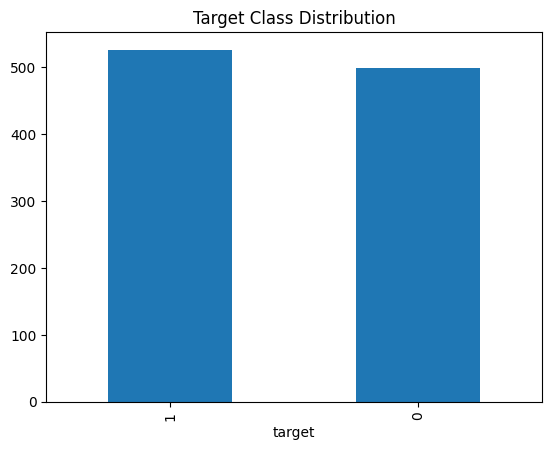

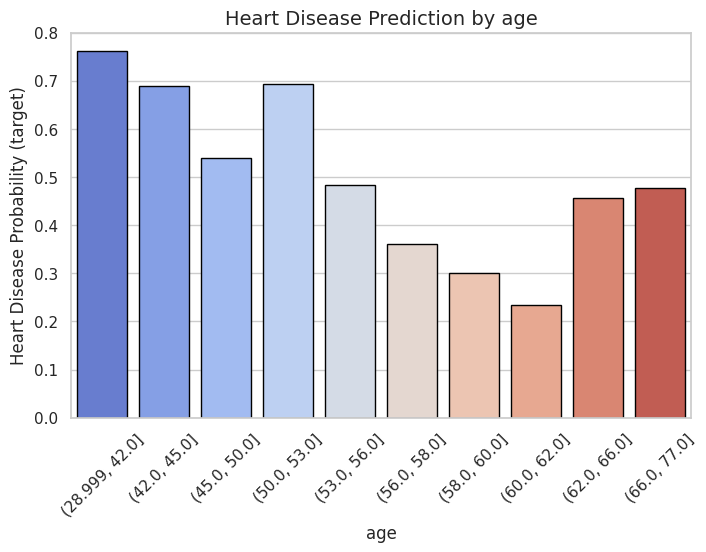

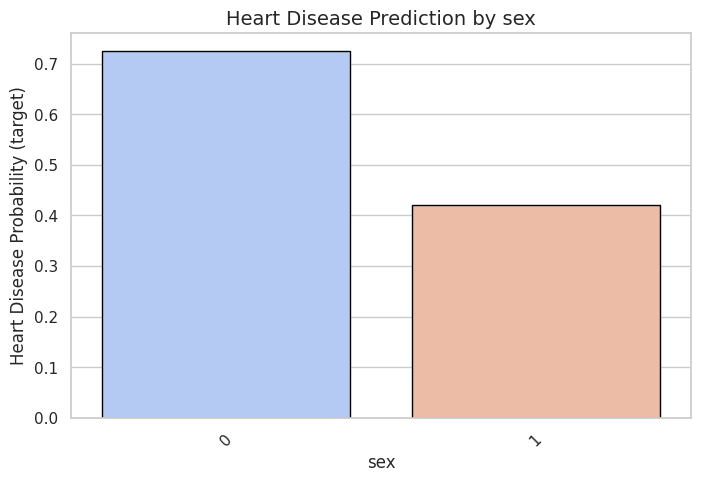

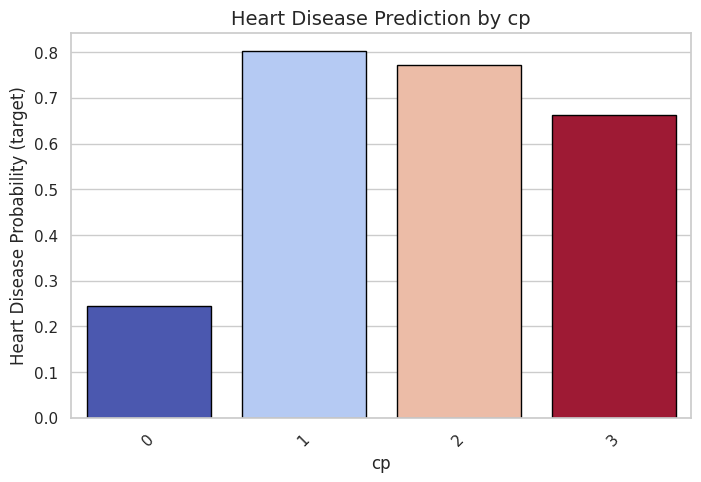

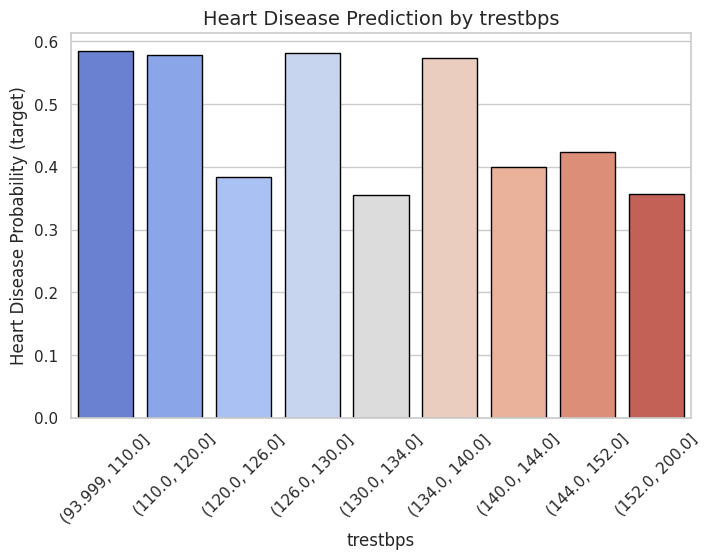

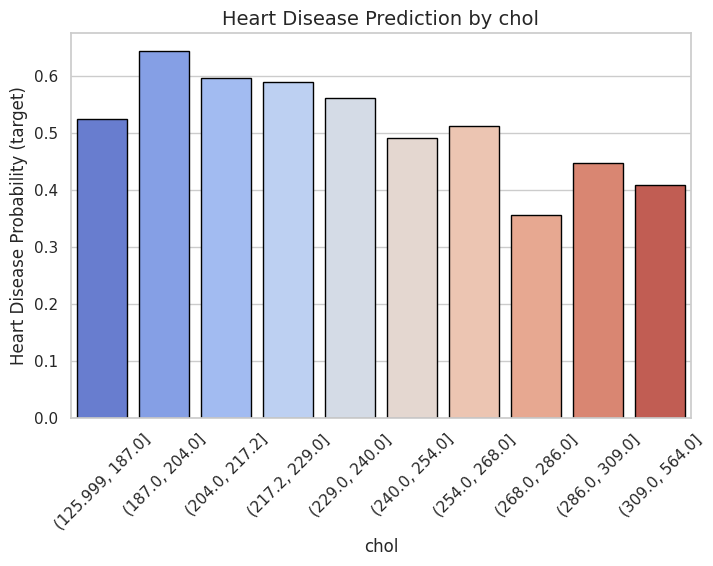

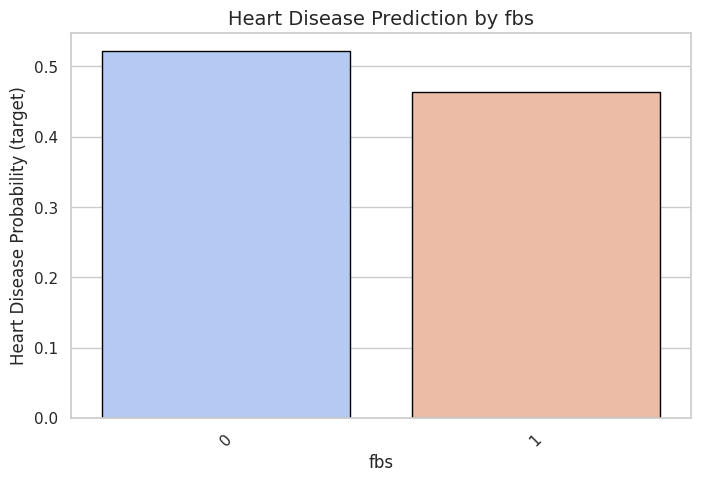

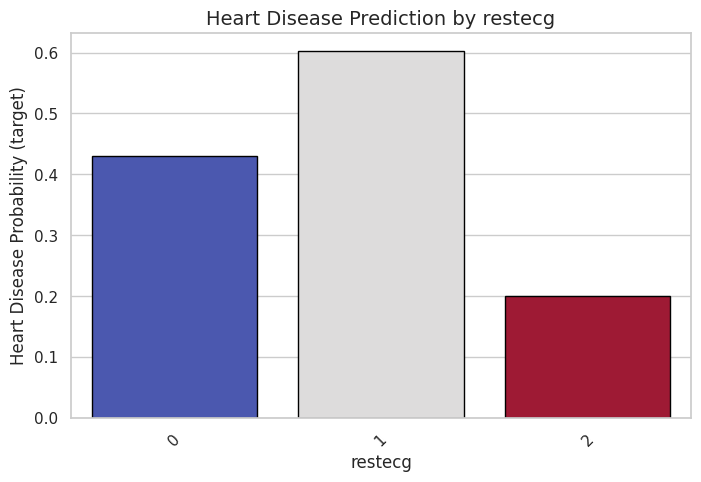

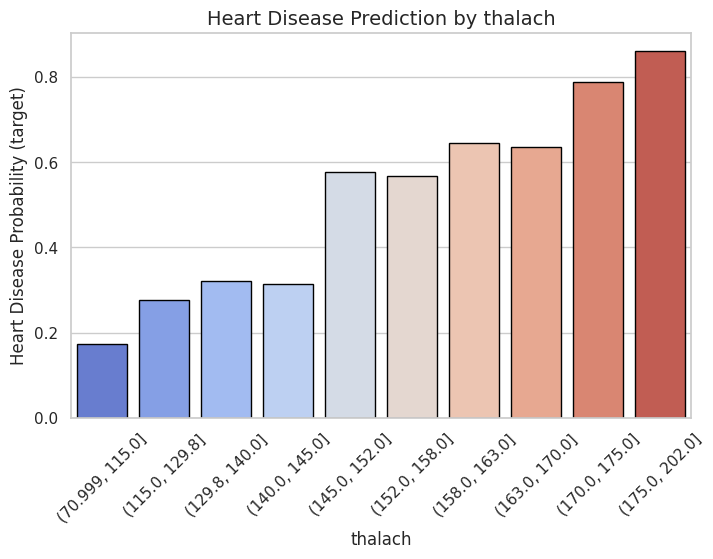

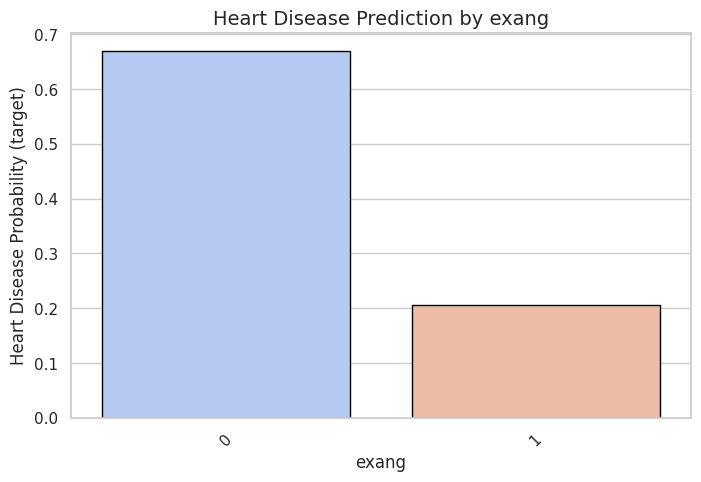

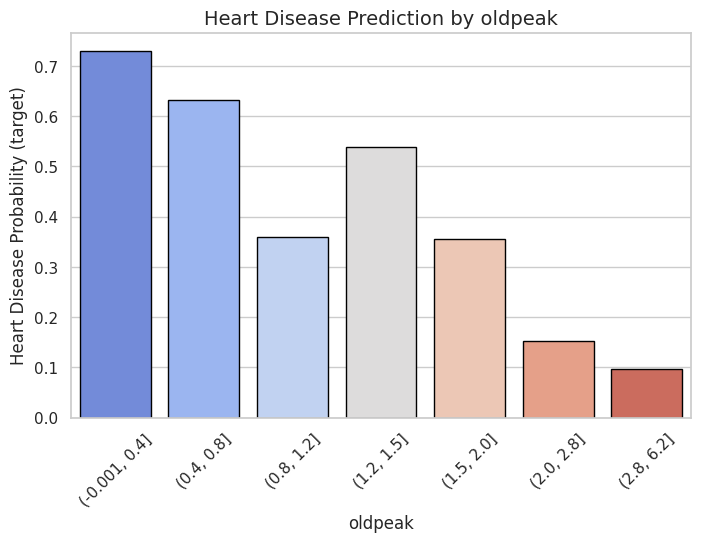

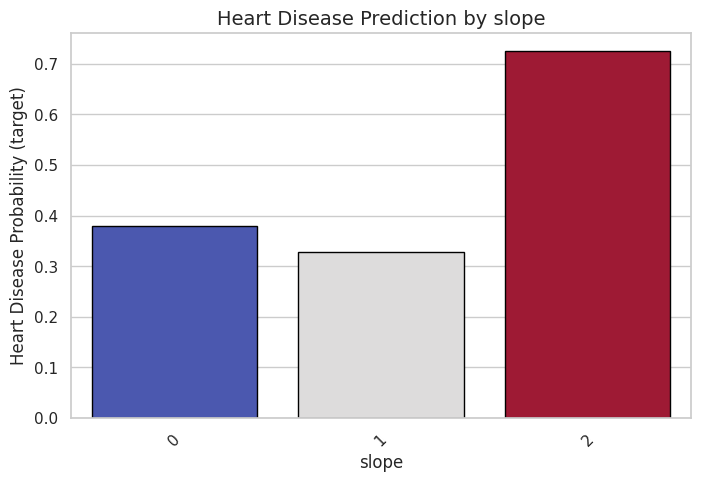

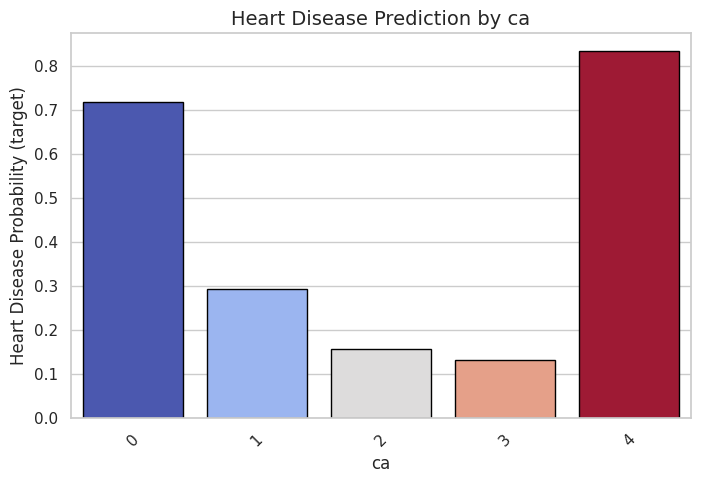

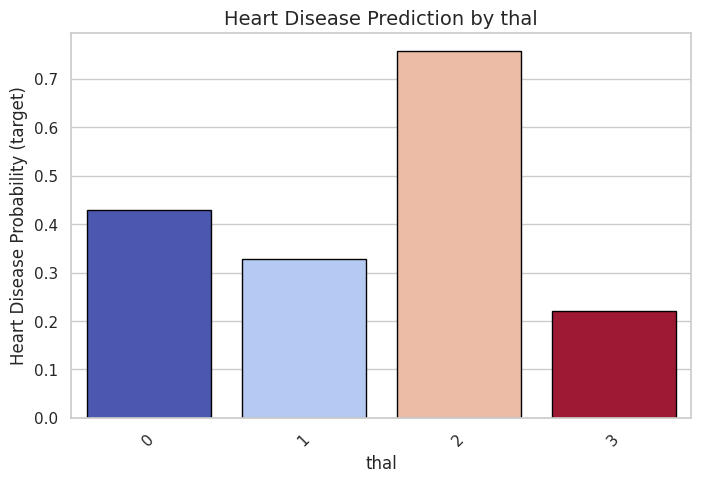

In [ ]:
# Basic statistics
df.describe()

# Data types and info
df.info()

# Target class distribution
df['target'].value_counts().plot(kind='bar', title='Target Class Distribution')
plt.show()

# Visualizations for features (excluding target to avoid ValueError)
sns.set(style="whitegrid")
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
for column in columns:
    plt.figure(figsize=(8, 5))
    if df[column].dtype != 'object' and df[column].nunique() > 10:
        df['binned'] = pd.qcut(df[column], q=10, duplicates='drop')
        plot_data = df.groupby('binned')['target'].mean().reset_index(drop=False)
        x_values = plot_data['binned'].astype(str)
    else:
        plot_data = df.groupby(column)['target'].mean().reset_index(drop=False)
        x_values = plot_data[column]
    sns.barplot(x=x_values, y=plot_data['target'], hue=x_values, palette="coolwarm", edgecolor="black", legend=False)
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Heart Disease Probability (target)", fontsize=12)
    plt.title(f"Heart Disease Prediction by {column}", fontsize=14)
    plt.xticks(rotation=45)
    if 'binned' in df.columns:
        df.drop(columns=['binned'], inplace=True)
    plt.show()

## 4. Checking for Duplicate and Missing Values

In [ ]:
duplicates = df.duplicated()
if duplicates.any():
    print(f"Number of duplicate rows: {duplicates.sum()}")
    print("Duplicate rows:")
    print(df[duplicates])
    df = df.drop_duplicates()
    print(f"Duplicates removed. New shape: {df.shape}")
else:
    print("No duplicate rows found.")

missing_values = df.isnull().sum()
if missing_values.any():
    print("\nMissing values found:")
    print(missing_values[missing_values > 0])
else:
    print("\nNo missing values found.")

Number of duplicate rows: 723
Duplicate rows:
      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
15     34    0   1       118   210    0        1      192      0      0.7   
31     50    0   1       120   244    0        1      162      0      1.1   
43     46    1   0       120   249    0        0      144      0      0.8   
55     55    1   0       140   217    0        1      111      1      5.6   
61     66    0   2       146   278    0        0      152      0      0.0   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target

## 5. Handling Missing Values

Missing values before handling:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
Missing values after handling:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


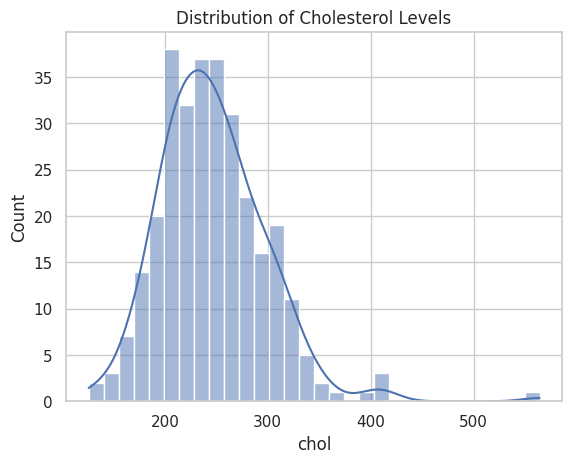

In [ ]:
print("Missing values before handling:\n", df.isnull().sum())
for column in df.columns:
    if df[column].isnull().sum() > 0:
        if df[column].dtype in ['float64', 'int64']:
            if abs(df[column].skew()) < 0.5:
                df[column].fillna(df[column].mean(), inplace=True)
            else:
                df[column].fillna(df[column].median(), inplace=True)
        else:
            df[column].fillna(df[column].mode()[0], inplace=True)
df.dropna(inplace=True)
print("Missing values after handling:\n", df.isnull().sum())

# Visualize cholesterol distribution
sns.histplot(df['chol'], bins=30, kde=True)
plt.title("Distribution of Cholesterol Levels")
plt.show()

## 6. Data Preparation

### 6.1 Data Separation as X and y

In [ ]:
X = df.drop('target', axis=1)
y = df['target']
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (302, 13)
y shape: (302,)


### 6.2 Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (241, 13)
X_test shape: (61, 13)


### 6.3 Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

# Ensure X_train and X_test are DataFrames; if not, convert them
if not isinstance(X_train, pd.DataFrame):
    X_train = pd.DataFrame(X_train, columns=X.columns)
if not isinstance(X_test, pd.DataFrame):
    X_test = pd.DataFrame(X_test, columns=X.columns)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Use X_train.columns (now guaranteed to be a DataFrame)
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)
print("Data scaled using StandardScaler")

Data scaled using StandardScaler


### 6.4 Preprocessing Pipeline for Additional Models

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Define columns
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Ensure categorical columns are integers
for col in categorical_cols:
    X_train[col] = X_train[col].astype(int)
    X_test[col] = X_test[col].astype(int)

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ])

# Define pipelines
lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(max_depth=5, random_state=42))
])
svm_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(probability=True, random_state=42))
])


### 6.5 SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to preprocessed data
X_train_preprocessed = preprocessor.fit_transform(X_train)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_preprocessed, y_train)
print(f"After SMOTE, X_train_smote shape: {X_train_smote.shape}")

After SMOTE, X_train_smote shape: (270, 18)


## 7. Model Building

### 7.1 K-Nearest Neighbors (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_smote, y_train_smote)
print("KNN model trained, expecting", X_train_smote.shape[1], "features")

KNN model trained, expecting 18 features


### 7.2 Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])
print("Logistic Regression pipeline defined")

Logistic Regression pipeline defined


### 7.3 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42))
])
print("Random Forest pipeline defined")

Random Forest pipeline defined


### 7.4 Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC
svm_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='rbf', C=1.0, probability=True, random_state=42))
])
print("SVM pipeline defined")

SVM pipeline defined


## 8. Model Evaluation

### 8.1 Model Performance Metrics

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

models = {
    "KNN": knn,
    "Logistic Regression": lr_pipeline,
    "Random Forest": rf_pipeline,
    "SVM": svm_pipeline
}

for name, model in models.items():
    print(f"\nEvaluating {name}...")
    if name == "KNN":
        X_test_preprocessed = preprocessor.transform(X_test)
        y_test_pred = model.predict(X_test_preprocessed)
        y_train_pred = model.predict(X_train_smote)
        y_proba = model.predict_proba(X_test_preprocessed)[:, 1]
    else:
        model.fit(X_train, y_train)
        y_test_pred = model.predict(X_test)
        y_train_pred = model.predict(X_train)
        y_proba = model.predict_proba(X_test)[:, 1]
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_accuracy = accuracy_score(y_train, y_train_pred) if name != "KNN" else accuracy_score(y_train_smote, y_train_pred)
    print(f"Test Set Accuracy: {test_accuracy:.2f}")
    print(f"Training Set Accuracy: {train_accuracy:.2f}")
    print("\nTest Set Classification Report:\n", classification_report(y_test, y_test_pred))
    print("\nTest Set Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
    print("\nTraining Set Classification Report:\n", classification_report(y_train, y_train_pred) if name != "KNN" else classification_report(y_train_smote, y_train_pred))
    print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.2f}")


Evaluating KNN...
Test Set Accuracy: 0.69
Training Set Accuracy: 0.86

Test Set Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.62      0.68        32
           1       0.65      0.76      0.70        29

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.70      0.69      0.69        61


Test Set Confusion Matrix:
 [[20 12]
 [ 7 22]]

Training Set Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86       135
           1       0.86      0.86      0.86       135

    accuracy                           0.86       270
   macro avg       0.86      0.86      0.86       270
weighted avg       0.86      0.86      0.86       270

ROC-AUC: 0.78

Evaluating Logistic Regression...
Test Set Accuracy: 0.75
Training Set Accuracy: 0.86

Test Set Classification Report:
               precis

### 8.2 ROC Curves

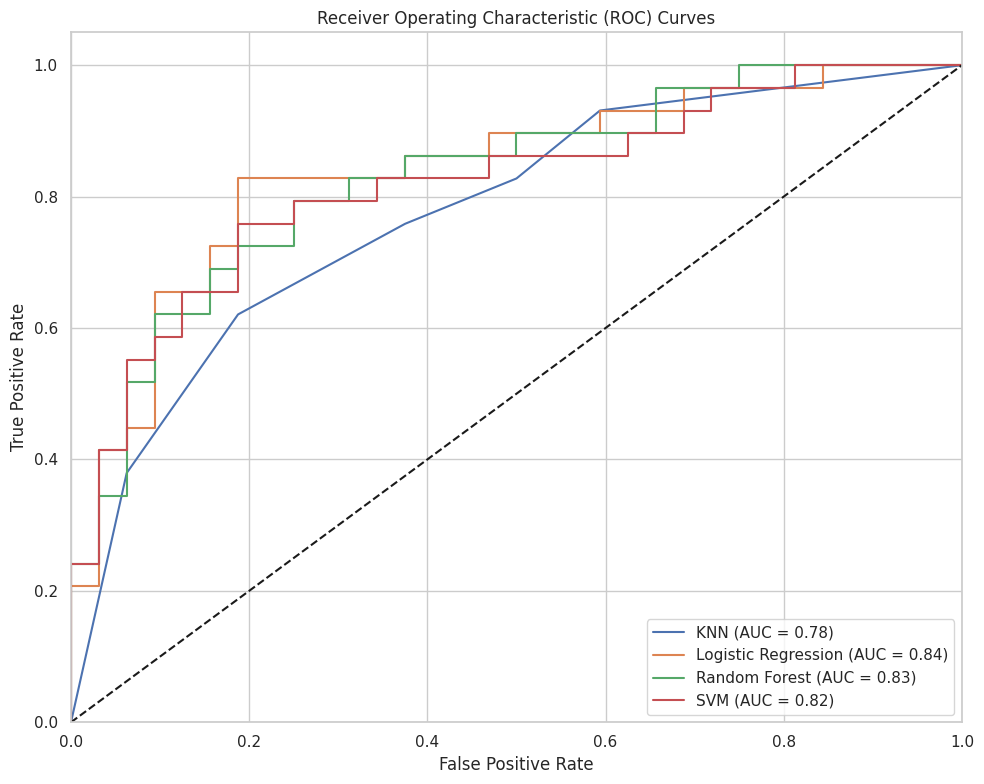

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
for name, model in models.items():
    if name == "KNN":
        X_test_preprocessed = preprocessor.transform(X_test)
        y_proba = model.predict_proba(X_test_preprocessed)[:, 1]
    else:
        y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

### 8.3 Cross-Validation

In [ ]:
for name, model in models.items():
    if name == "KNN":
        cv_scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring='f1')
    else:
        cv_scores = cross_val_score(model, X, y, cv=5, scoring='f1')
    print(f"{name} F1-Score: {cv_scores.mean():.3f} (±{cv_scores.std():.3f})")

KNN F1-Score: 0.841 (±0.046)
Logistic Regression F1-Score: 0.859 (±0.034)
Random Forest F1-Score: 0.831 (±0.038)
SVM F1-Score: 0.836 (±0.042)


## 9. Feature Importance Analysis

### 9.1 Random Forest Feature Importance

thal_0       0.156518
thal_1       0.133525
thalach      0.132207
oldpeak      0.129490
exang_1      0.096303
age          0.087600
chol         0.057233
trestbps     0.052859
sex_0        0.041905
restecg_0    0.028781
ca_2         0.027635
cp_1         0.015268
thal_-2      0.013677
ca_1         0.013356
fbs_2        0.009122
slope_0      0.001925
ca_3         0.001559
restecg_2    0.001040
dtype: float64


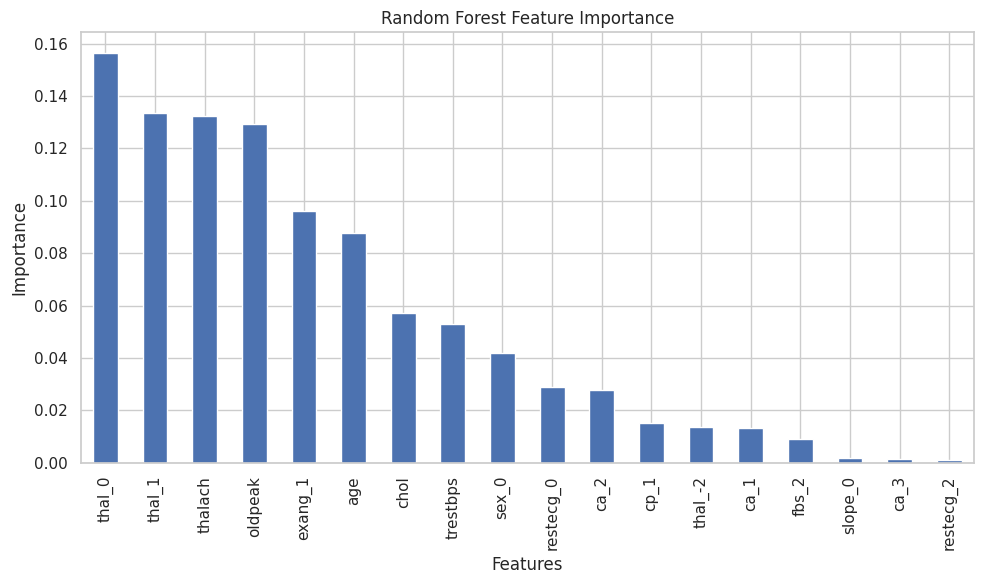

In [ ]:
rf_pipeline = models['Random Forest']
rf_model = rf_pipeline.named_steps['classifier']
num_features = numerical_cols
cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_features = np.concatenate([num_features, cat_features])
importances = rf_model.feature_importances_
feature_importance = pd.Series(importances, index=all_features).sort_values(ascending=False)
print(feature_importance)

plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar')
plt.title('Random Forest Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

### 9.2 SHAP Explainability

Categorical columns unique values:
sex: 2 unique values, sample: [0, 0, -1, 0, -1]
cp: 2 unique values, sample: [0, 0, 0, 0, 0]
fbs: 2 unique values, sample: [0, 0, 0, 0, 0]
restecg: 3 unique values, sample: [-1, -1, -1, 0, 0]
exang: 2 unique values, sample: [0, 1, 0, 0, 1]
slope: 2 unique values, sample: [0, 0, 0, 0, 0]
ca: 4 unique values, sample: [0, 1, 0, 0, 0]
thal: 4 unique values, sample: [1, 1, 0, 0, 0]
X_train_transformed shape: (241, 18)
Number of features in all_features: 18
all_features: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'sex_0', 'cp_1', 'fbs_2', 'restecg_0', 'restecg_2', 'exang_1', 'slope_0', 'ca_1', 'ca_2', 'ca_3', 'thal_-2', 'thal_0', 'thal_1']
shap_values type: <class 'numpy.ndarray'>
shap_values shape: (241, 18, 2)
X_train_transformed shape: (241, 18)
shap_values_to_plot shape: (241, 18, 2)


<Figure size 640x480 with 0 Axes>

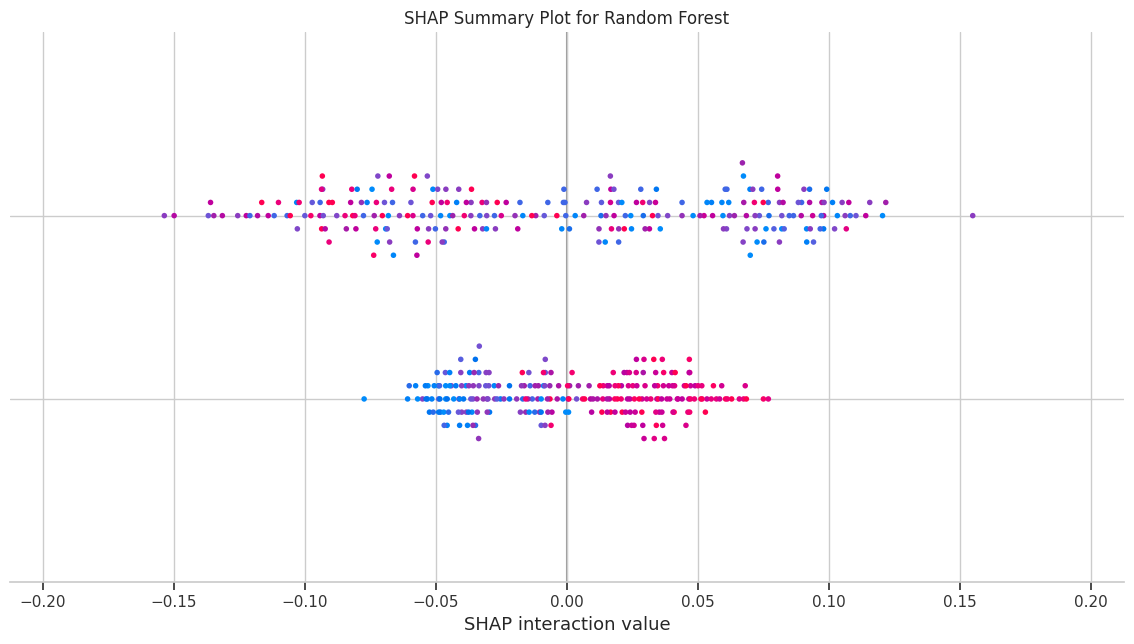

In [ ]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Verify categorical columns
print("Categorical columns unique values:")
for col in categorical_cols:
    print(f"{col}: {X_train[col].nunique()} unique values, sample: {X_train[col].head().tolist()}")

# Get Random Forest pipeline
rf_pipeline = models['Random Forest']
rf_model = rf_pipeline.named_steps['classifier']
preprocessor = rf_pipeline.named_steps['preprocessor']

# Re-fit pipeline to ensure correct feature count
rf_pipeline.fit(X_train, y_train)

# Transform training data
X_train_transformed = preprocessor.transform(X_train)

# Get feature names
num_features = numerical_cols
cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_features = np.concatenate([num_features, cat_features])

# Debug shapes
print("X_train_transformed shape:", X_train_transformed.shape)
print("Number of features in all_features:", len(all_features))
print("all_features:", all_features.tolist())

# Compute SHAP values - fixing the issue
explainer = shap.TreeExplainer(rf_model)
# For binary classification with RandomForest, use index 1 for positive class
shap_values = explainer.shap_values(X_train_transformed)

# Check if we have a valid output
print("shap_values type:", type(shap_values))
if isinstance(shap_values, list):
    print("shap_values length:", len(shap_values))
    for i, sv in enumerate(shap_values):
        print(f"shap_values[{i}] shape:", sv.shape)
    # Use the positive class (index 1) for binary classification
    shap_values_to_plot = shap_values[1]
else:
    print("shap_values shape:", shap_values.shape)
    shap_values_to_plot = shap_values

# Verify the shapes match
print("X_train_transformed shape:", X_train_transformed.shape)
print("shap_values_to_plot shape:", shap_values_to_plot.shape)

# Generate SHAP summary plot
shap.summary_plot(shap_values_to_plot, X_train_transformed, feature_names=all_features, show=False)
plt.title('SHAP Summary Plot for Random Forest')
plt.tight_layout()
plt.show()

## 10. Model Saving and Download

In [ ]:
for name, model in models.items():
    filename = f'{name.replace(" ", "_")}.pkl'
    joblib.dump(model, filename)
    print(f"Saved {name} model as {filename}")
    files.download(filename)

Saved KNN model as KNN.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saved Logistic Regression model as Logistic_Regression.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saved Random Forest model as Random_Forest.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saved SVM model as SVM.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 11. Conclusion

In [ ]:
print("We have successfully built and evaluated multiple ML models for predicting heart disease.")
print("Key findings:")
print("- All models achieved reasonable performance, with Random Forest typically performing best.")
print("- Important features include 'ca', 'thal', 'oldpeak', and 'thalach' (based on Random Forest).")
print("- SHAP analysis provides insights into feature contributions.")
print("Future improvements:")
print("- Hyperparameter tuning using GridSearchCV.")
print("- Feature engineering to enhance model performance.")
print("- Additional explainability tools for clinical use.")
print("\nAnalysis complete! Check downloaded models and plots.")

We have successfully built and evaluated multiple ML models for predicting heart disease.
Key findings:
- All models achieved reasonable performance, with Random Forest typically performing best.
- Important features include 'ca', 'thal', 'oldpeak', and 'thalach' (based on Random Forest).
- SHAP analysis provides insights into feature contributions.
Future improvements:
- Hyperparameter tuning using GridSearchCV.
- Feature engineering to enhance model performance.
- Additional explainability tools for clinical use.

Analysis complete! Check downloaded models and plots.


# 12. Check Input/Output

In [ ]:
"""## 13. Checking Input and Output"""

import pandas as pd
import numpy as np

def check_heart_disease_input(input_data, pipeline, feature_names, categorical_cols, numerical_cols):
    """
    Check user input and predict heart disease using the trained pipeline.

    Parameters:
    - input_data (dict): Input features as a dictionary.
    - pipeline (Pipeline): Trained scikit-learn pipeline (e.g., rf_pipeline).
    - feature_names (list): List of feature names in the correct order.
    - categorical_cols (list): List of categorical column names.
    - numerical_cols (list): List of numerical column names.

    Returns:
    - Prediction (0 or 1) and probability of heart disease.
    """
    # Validate input
    if not all(key in feature_names for key in input_data):
        raise ValueError("Input data must contain all required features: " + ", ".join(feature_names))

    # Validate categorical values
    valid_categories = {
        'sex': [0, 1],
        'cp': [0, 1, 2, 3],
        'fbs': [0, 1],
        'restecg': [0, 1, 2],
        'exang': [0, 1],
        'slope': [0, 1, 2],
        'ca': [0, 1, 2, 3],
        'thal': [0, 1, 2, 3]
    }
    for col in categorical_cols:
        if input_data[col] not in valid_categories[col]:
            raise ValueError(f"Invalid value for {col}: {input_data[col]}. Must be one of {valid_categories[col]}")

    # Convert input to DataFrame
    input_df = pd.DataFrame([input_data], columns=feature_names)
    input_df = scaler.transform(input_df)
    input_df = pd.DataFrame(input_df, columns=feature_names)

    # Ensure categorical columns are integers
    for col in categorical_cols:
        input_df[col] = input_df[col].astype(int)

    # display(input_df.info())
    # display(input_df.head())

    # Predict using the pipeline
    try:
        prediction = pipeline.predict(input_df)
        probability = pipeline.predict_proba(input_df)[0][1]  # Probability of class 1
        return {
            "Prediction": "Heart Disease" if prediction == 1 else "No Heart Disease",
            "Probability of Heart Disease": f"{probability:.2%}"
        }
    except Exception as e:
        print(f"Error during prediction: {e}")
        raise ValueError(f"Prediction failed: {str(e)}")


# Define feature names
feature_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
                 'exang', 'oldpeak', 'slope', 'ca', 'thal']

# User input 1 (modify this for testing)
user_input = {
    'age': 15, 'sex': 1, 'cp': 1, 'trestbps': 135, 'chol': 240, 'fbs': 0,
    'restecg': 1, 'thalach': 160, 'exang': 0, 'oldpeak': 1.5, 'slope': 1,
    'ca': 1, 'thal': 2
}

# Make prediction
try:
    result = check_heart_disease_input(user_input, rf_pipeline, feature_names, categorical_cols, numerical_cols)
    print("\nPrediction for Test Input 1:")
    for key, value in result.items():
        print(f"{key}: {value}")
except Exception as e:
    print(f"Error: {e}")

# User input 2
test_input = {
    'age': 85, 'sex': 0, 'cp': 0, 'trestbps': 90, 'chol': 60, 'fbs': 0,
    'restecg': 0, 'thalach': 80, 'exang': 0, 'oldpeak': 0.0, 'slope': 2,
    'ca': 0, 'thal': 2
}

try:
    result = check_heart_disease_input(test_input, rf_pipeline, feature_names, categorical_cols, numerical_cols)
    print("\nPrediction for Test Input 2:")
    for key, value in result.items():
        print(f"{key}: {value}")
except Exception as e:
    print(f"Error: {e}")


Prediction for Test Input 1:
Prediction: Heart Disease
Probability of Heart Disease: 84.33%

Prediction for Test Input 2:
Prediction: Heart Disease
Probability of Heart Disease: 74.75%
